In [3]:
#line plot with multifacets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
nuqta= sns.load_dataset("dots")
nuqta.head

<bound method NDFrame.head of     align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
..    ...    ...   ...        ...          ...
843  sacc     T2   300        3.2    33.281734
844  sacc     T2   300        6.4    27.583979
845  sacc     T2   300       12.8    28.511530
846  sacc     T2   300       25.6    27.009804
847  sacc     T2   300       51.2    30.959302

[848 rows x 5 columns]>

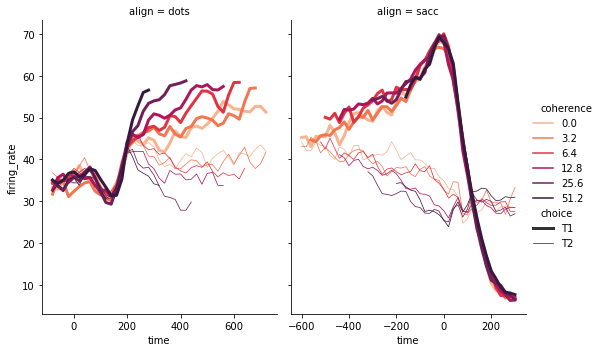

In [2]:
#line plot with multifacets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
nuqta= sns.load_dataset("dots")
pelette = sns.color_palette('rocket_r')
sns.relplot(data= nuqta, x="time", y= "firing_rate", hue="coherence", size="choice", col="align",
           kind="line", size_order=["T1", "T2"], palette=pelette, height=5, aspect=.75, facet_kws=dict(sharex=False))

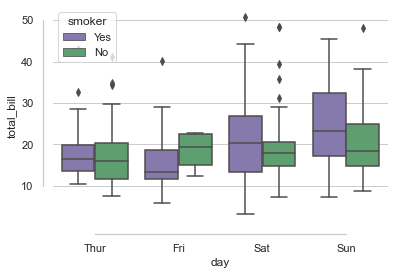

In [4]:
import seaborn as sns


# canvas (baloon board)
sns.set(style='whitegrid')
#tip= sns.load_dataset("tips")
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill",
           hue="smoker", palette=["m", "g"],data=tips)
sns.despine(offset=10, trim=True)

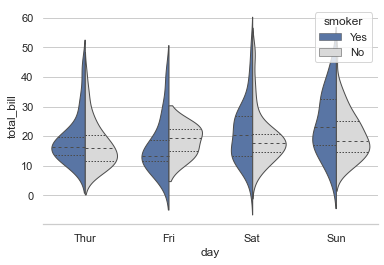

In [8]:
import seaborn as sns


# canvas (baloon board)
sns.set(style='whitegrid')
#tip= sns.load_dataset("tips")
tips = sns.load_dataset("tips")
sns.violinplot(x="day", y="total_bill", hue="smoker", inner="quart", split=True, linewidth=1,
            palette={"Yes":"b", "No":".85"},data=tips)
sns.despine(left=True)

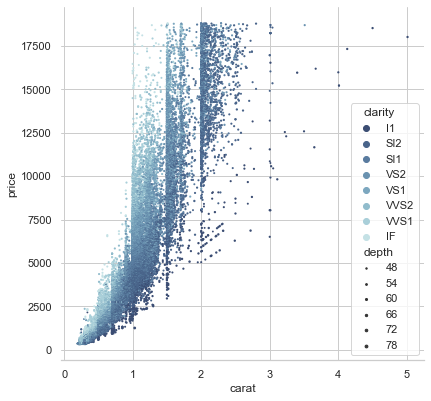

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# canvas (baloon board)
sns.set(style='whitegrid')
#tip= sns.load_dataset("tips")
diamonds = sns.load_dataset("diamonds")
f,ax= plt.subplots(figsize=(6.5,6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2","VVS1","IF"]
sns.scatterplot(x="carat", y="price", hue="clarity", size="depth", linewidth=0, hue_order=clarity_ranking, sizes=(1, 8),
            palette="ch:r=-.2, d=.3_r",data=diamonds, ax=ax)
sns.despine(left=True)

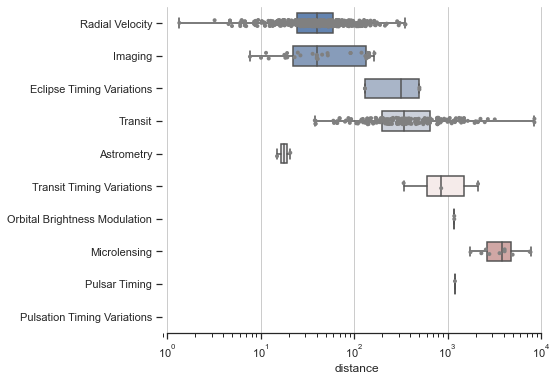

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# canvas (baloon board)
sns.set(style="ticks")
f,ax= plt.subplots(figsize=(7,6))
ax.set_xscale("log")
#tip= sns.load_dataset("tips")
planets = sns.load_dataset("planets")
sns.boxplot(x="distance", y="method", data=planets, whis=[0,100], width=.6, palette="vlag")
sns.stripplot(x="distance", y="method", data=planets,
             size=4,color=".5", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

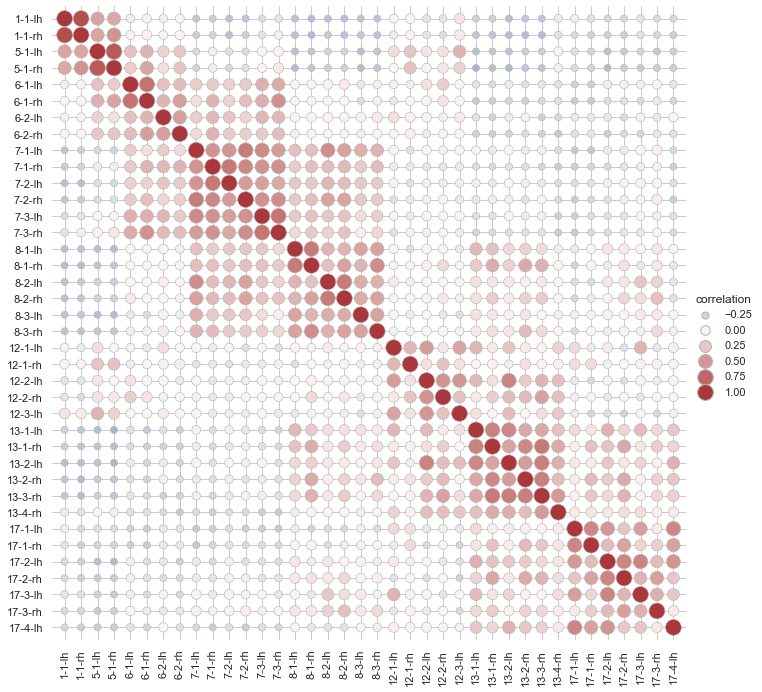

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# canvas (baloon board)
sns.set(style='whitegrid')
df=sns.load_dataset("brain_networks", header=[0,1,2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network").astype(int).isin(used_networks))
df=df.loc[:, used_columns]
df.columns = df.columns.map("-".join)
corr_mat = df.corr().stack().reset_index(name="correlation")
g=sns.relplot(data=corr_mat, x="level_0",y="level_1",  hue="correlation", size="correlation", palette="vlag", hue_norm=(-1,1), 
              edgecolor=".7",height=10, sizes=(50,250), size_norm= (-.2, .8))
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
    

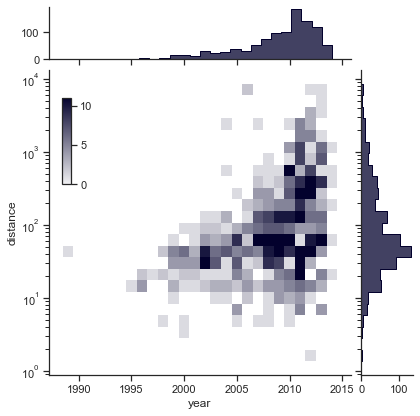

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# canvas (baloon board)
sns.set(style="ticks")
#tip= sns.load_dataset("tips")
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)
g.ax_joint.set(yscale="log")
cax = g.figure.add_axes([.15, .55, .02, .2])
g.plot_joint(sns.histplot, discrete=(True, False), cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax)

g.plot_marginals(sns.histplot, element="step", color="#03012d")

<AxesSubplot:xlabel='clarity', ylabel='carat'>

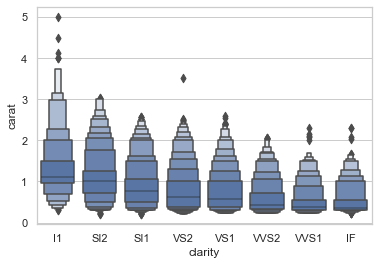

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# canvas (baloon board)
sns.set(style='whitegrid')
#tip= sns.load_dataset("tips")
diamonds = sns.load_dataset("diamonds")
#f,ax= plt.subplots(figsize=(6.5,6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2","VVS1","IF"]
sns.boxenplot(x="clarity", y="carat", color="b", order=clarity_ranking, scale="linear"
            ,data=diamonds)
#sns.despine(left=True)

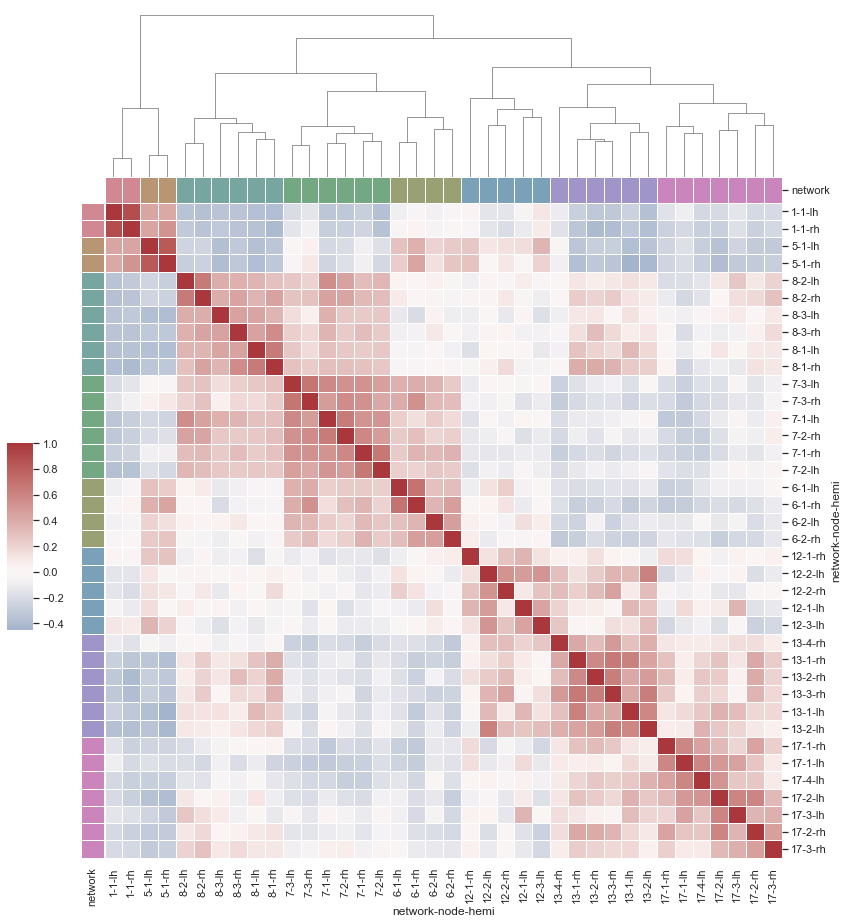

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# canvas (baloon board)
sns.set(style='whitegrid')
df=sns.load_dataset("brain_networks", header=[0,1,2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network").astype(int).isin(used_networks))
df=df.loc[:, used_columns]
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)


g=sns.clustermap(df.corr(), center=0, cmap="vlag", 
                 row_colors=network_colors, col_colors=network_colors,
              dendrogram_ratio=(.1,.2), cbar_pos=(.02,.32, .03, .2),
                linewidths=.75, figsize= (12,13))

g.ax_row_dendrogram.remove()

    

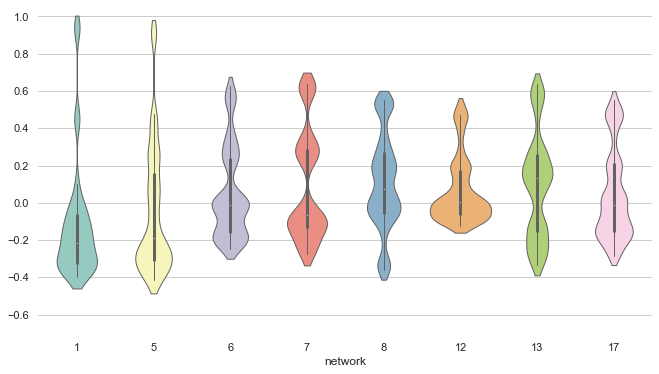

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# canvas (baloon board)
sns.set(style='whitegrid')
df=sns.load_dataset("brain_networks", header=[0,1,2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network").astype(int).isin(used_networks))
df=df.loc[:, used_columns]
corr_df = df.corr().groupby(level="network").mean()
corr_df.index= corr_df.index.astype(int)
corr_df= corr_df.sort_index().T
f,ax= plt.subplots(figsize=(11,6))
sns.violinplot(cut=1, bw=.2, split=True, linewidth=1,
            palette="Set3",data=corr_df)
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

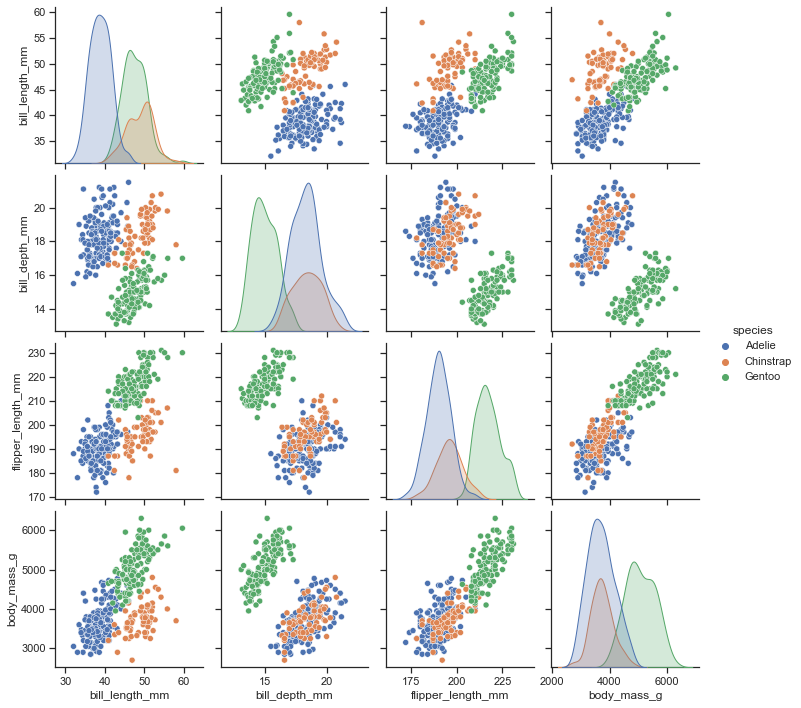

In [41]:
import seaborn as sns
sns.set_theme(style="ticks")
df=sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

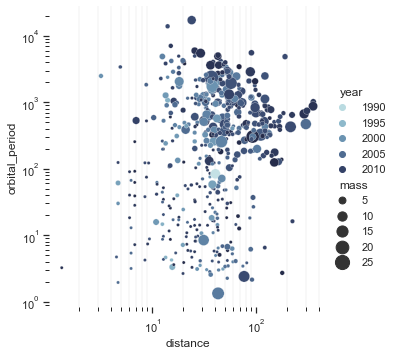

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


#tip= sns.load_dataset("tips")
planets = sns.load_dataset("planets")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data= planets, x="distance", y= "orbital_period", hue="year", size="mass", 
           palette=cmap, sizes=(10,200))
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

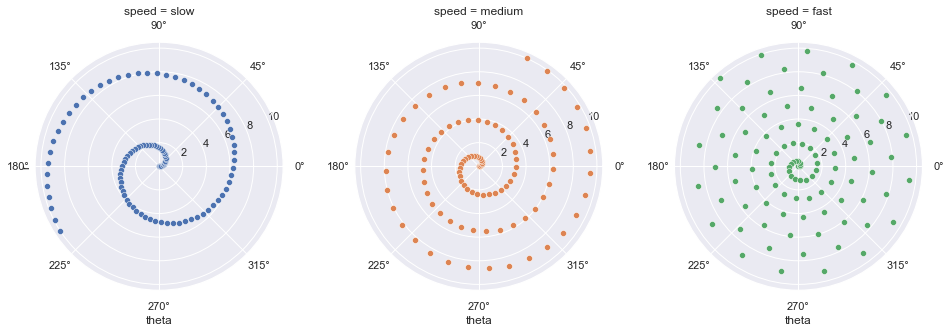

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
# generate a data set 
r= np.linspace(0, 10, num=100)
df = pd.DataFrame({'r':r, 'slow':r, 'medium':2*r, 'fast':4*r})
# convert the dataframe to long form or "tidy" format
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')
# setup a grid of axes with a polar projection
g= sns.FacetGrid(df, col="speed", hue="speed", 
               subplot_kws=dict(projection='polar'), height=4.5, 
               sharex=False, sharey=False, despine=False)
g.map(sns.scatterplot, "theta", "r")

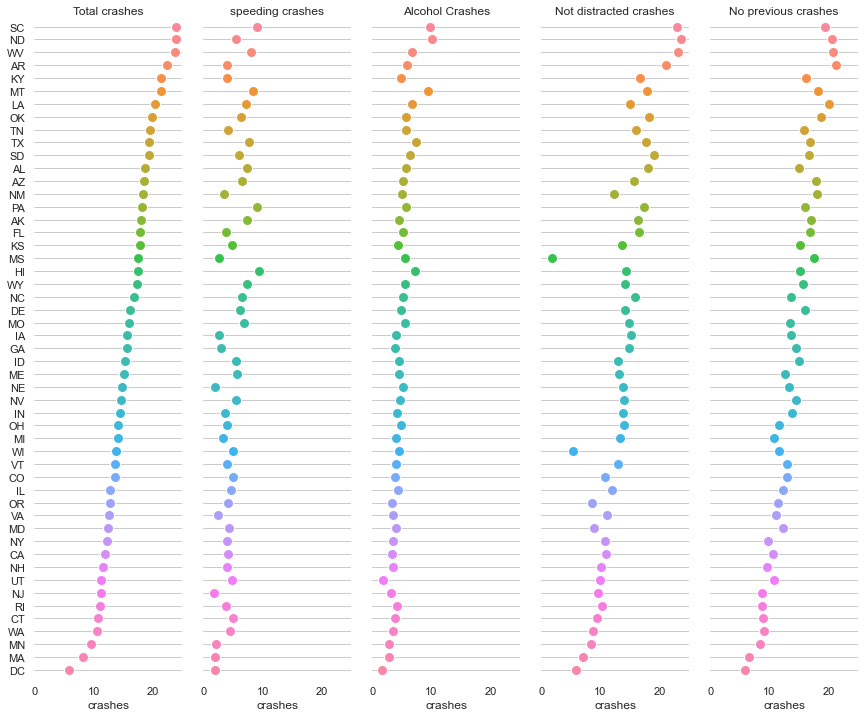

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
crashes = sns.load_dataset("car_crashes")
g= sns.PairGrid(crashes.sort_values("total", ascending=False),
               x_vars=crashes.columns[:-3],y_vars=["abbrev"],
               height=10,aspect=.25)

g.map(sns.stripplot, size=10, orient="h", jitter=False,  linewidth=1, edgecolor="w")
g.set(xlim=(0,25), xlabel="crashes", ylabel="")

titles = ["Total crashes", "speeding crashes", "Alcohol Crashes", "Not distracted crashes", "No previous crashes"]
for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    sns.despine(left=True, bottom=True)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

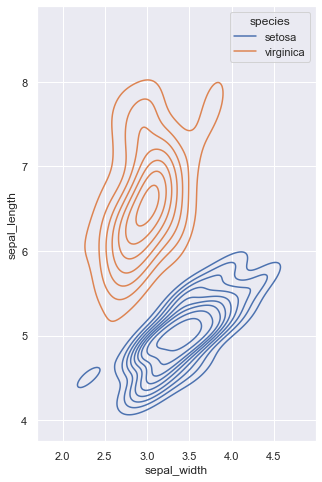

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1)

<AxesSubplot:xlabel='choice', ylabel='coherence'>

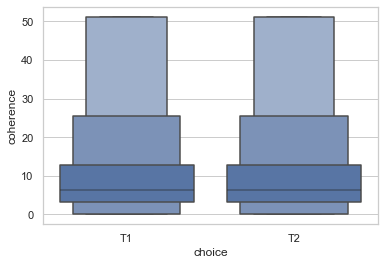

In [57]:
import seaborn as sns
sns.set_theme(style="whitegrid")

nuqta= sns.load_dataset("dots") 
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.boxenplot(x="choice", y="coherence",
              color="b",
              scale="linear", data=nuqta)

In [60]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Collecting plotly



In [61]:
import plotly.express as px
df= px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
                marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [71]:
import plotly.express as px
df= px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country", size="pop",
                 color="continent", hover_name="country",facet_col="continent",
                log_x=True, size_max=45, range_x=[100,1000], range_y=[25,90])
fig.show()
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [106]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

In [73]:
import plotly.express as px
df= px.data.gapminder().query("year==2007")

fig = px.sunburst(df, path=['continent', 'country'], values='pop', color='lifeExp', hover_data=['iso_alpha'])
                 
fig.show()

In [74]:
import plotly.express as px
df = px.data.tips()
fig = px.parallel_categories(df, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [75]:
import plotly.express as px
df = px.data.gapminder()
fig = px.line(df, x="year", y="lifeExp", color="continent", line_group="country", hover_name="country",
        line_shape="spline", render_mode="svg")
fig.show()

In [77]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

In [78]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.icicle(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

In [79]:
import plotly.express as px
df = px.data.tips()
fig = px.violin(df, y="tip", x="smoker", color="sex", box=True, points="all", hover_data=df.columns)
fig.show()

In [80]:
import plotly.express as px
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]
fig = px.imshow(data,
                labels=dict(x="Day of Week", y="Time of Day", color="Productivity"),
                x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                y=['Morning', 'Afternoon', 'Evening']
               )
fig.update_xaxes(side="top")
fig.show()


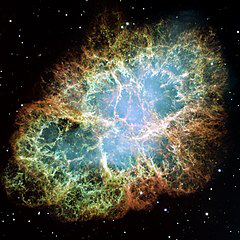

In [81]:
import plotly.express as px
from skimage import io
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Crab_Nebula.jpg/240px-Crab_Nebula.jpg')
fig = px.imshow(img)
fig.show()

In [82]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df, locations="iso_alpha", color="continent", hover_name="country", size="pop",
               animation_frame="year", projection="natural earth")
fig.show()

In [83]:
import plotly.express as px
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", color="strength", template="plotly_dark",
            color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [84]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\nasirnauman\anaconda3\lib\site-packages (1.20.3)



In [103]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_3d(df, x="Joly", y="Coderre", z="Bergeron", color="winner", size="total", hover_name="district",
                  symbol="result", color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
fig.show()


In [86]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron", color="winner", size="total", hover_name="district",
                   size_max=15, color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"} )
fig.show()

In [97]:
a = np.arange(10)
a2 = a[np.newaxis, :]
a2.shape


(1, 10)

In [91]:
a = np.array([1, 2, 3, 4, 5, 6])
a[0]

1

In [112]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12],[8, 6, 7, 10]])
b=np.sort(a[3])
a


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [ 8,  6,  7, 10]])

In [101]:
arr = np.array([2, 1, 5, 3, 7, 4, 6, 8])
np.sort(arr)


array([1, 2, 3, 4, 5, 6, 7, 8])

In [114]:
np.ones(3)

array([1., 1., 1.])

In [117]:
g=np.arange(1,20,2)
g

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [139]:
h=np.linspace(0, 10, num=5)
h

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [123]:
i= np.ones(5, dtype=np.int8)
i

array([1, 1, 1, 1, 1], dtype=int8)

In [125]:
j= np.ones(5, dtype=np.float64)
j

array([1., 1., 1., 1., 1.])

In [140]:
np.zeros((5,4), dtype=np.int64)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

In [128]:
np.ones((7,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [129]:
np.empty((5,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [138]:
d= np.arange(64).reshape(4, 4, 4)
d

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]]])